In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 基础操作

### 读取/显示/保存 图片

In [2]:
# opencv中是以BGR的顺序存储的（调换了1和3通道）
img = cv2.imread('../.figure/lena.jpg')
    # 省略了第二个参数图片类型：彩色图、灰度图、带透明通道图

cv2.imshow('lena', img)     # 不同窗口以窗口名区分
cv2.waitKey(0)      # 让窗口一直等待，不继续执行

cv2.imwrite('lena.jpg', img)

True

### 摄像头

In [ ]:
capture = cv2.VideoCapture(0)

# capture.get(id)       # 不同的id获取摄像头属性
# capture.set(xxx)      # 修改摄像头的一些属性

while True:
    ret, frame = capture.read()
    cv2.imshow('frame', frame)

### 视频

省略[录制保存视频](http://codec.wang/#/opencv/start/03-open-camera)等操作

In [ ]:
capture = cv2.VideoCapture('demo.mp4')

while capture.isOpened():
    ret, frame = capture.read()
    # todo with frame

## 图像操作

In [6]:
img = cv2.imread('../.figure/lena.jpg')
# 像素操作
print(img[100, 50])     # 获取像素值
print(img[100, 50, 0])  # 获取B通道的值
print(img.item(100, 50, 0))     # 性能更好，不过只能逐通道获取

img[100, 50] = [255, 255, 255]      # 修改像素值，⚠️只是内存中的变量改变了，没有保存所以原图没有修改

[ 76  66 173]
76
76


In [7]:
height, width, channels = img.shape
print(img.shape)    # 尺寸
print(img.dtype)    # 数据类型
print(img.size)     # 总像素数

(263, 263, 3)
uint8
207507


In [10]:
# 通道分割与合并
b, g, r = cv2.split(img)        # 比较耗时
img = cv2.merge((b, g, r))

b, g, r = img[:, :, 0], img[:, 0, :], img[0, :, :]
print(b)

[[126 125 124 ... 126 117  85]
 [127 126 122 ... 131 128  93]
 [124 125 121 ... 140 134  93]
 ...
 [ 59  59  59 ...  80  79  80]
 [ 56  58  55 ...  84  85  80]
 [ 51  63  58 ...  85  88  88]]


### 颜色空间

HSV比RGB更容易区分颜色，可以用来提取某个颜色的部分

由于某些原因 H的范围是[0, 179] S V的范围是[0, 255]

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 常见的灰度化: gray = 0.299 * R + 0.587 * G + 0.114 * B

# 显示所有转换模式
# print([_ for _ in dir(cv2) if _.startswith('COLOR_')])

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

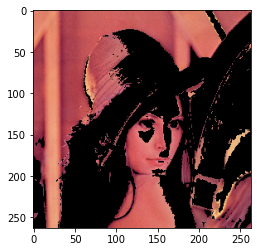

In [21]:
# 只保留某个颜色的部分
lower = np.array([100, 110, 110])   # ⚠️这个颜色也要提前转换为hsv格式
upper = np.array([130, 255, 255])

img = cv2.imread('../.figure/lena.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(res[:,:,::-1])